In [1]:
import pandas as pd
pd.read_csv("training_data.csv")

,lat,lon,elevation,radiance,ndvi,Swnet_min,Swnet_max,Swnet_avg,Lwnet_min,Lwnet_max,...,Psurf_max,Psurf_avg,SWdown_min,SWdown_max,SWdown_avg,LWdown_min,LWdown_max,LWdown_avg,ecosystem,name
0,48.875,2.375,78.0,50.000788,0.394561,23.804476,204.75125,114.745090,-82.530136,-34.475700,...,101450.805,100724.990,26.911814,242.07588,133.78767,294.61588,369.89417,325.08878,Artificial-Urban-Buildings,Paris
1,48.875,2.375,78.0,50.000786,0.394561,23.804476,204.75125,114.745090,-82.530136,-34.475700,...,101450.805,100724.990,26.911814,242.07588,133.78767,294.61588,369.89417,325.08878,Artificial-Urban-Buildings,Paris
2,55.625,37.375,178.0,53.315880,0.384737,7.898710,207.36024,94.561580,-65.604850,-34.780777,...,100506.336,99335.625,18.593588,243.78150,113.59347,244.96031,349.84656,294.91406,Artificial-Urban-Buildings,Moscow
3,55.625,37.375,178.0,53.315880,0.384737,7.898710,207.36024,94.561580,-65.604850,-34.780777,...,100506.336,99335.625,18.593588,243.78150,113.59347,244.96031,349.84656,294.91406,Artificial-Urban-Buildings,Moscow
4,55.625,37.625,176.0,67.825235,0.281922,7.779113,207.68834,94.127045,-70.549515,-35.140170,...,100761.810,99556.500,18.608912,245.13892,113.67422,243.60768,352.66968,295.14774,Artificial-Urban-Buildings,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,49.875,86.375,2303.0,NaN,0.209652,17.054031,223.36113,103.034830,-78.618360,-35.718200,...,74996.030,74646.750,45.920040,262.84116,153.94405,175.25006,297.56250,232.98253,Natural-Montane-Alpine_tundra,"Altai Mountains (Russia, Mongolia)"
8656,49.875,86.625,3165.0,NaN,0.154065,17.172620,230.12871,108.186790,-78.889330,-36.169410,...,76582.200,76243.620,45.943750,265.62048,155.09938,178.02470,306.01685,237.14937,Natural-Montane-Alpine_tundra,"Altai Mountains (Russia, Mongolia)"
8657,49.875,86.875,2669.0,NaN,0.158660,17.895765,233.37935,110.488840,-81.191950,-36.925133,...,76581.290,76239.400,46.666935,266.08185,156.66454,173.54204,305.67660,234.59496,Natural-Montane-Alpine_tundra,"Altai Mountains (Russia, Mongolia)"
8658,49.875,87.125,2295.0,NaN,0.196507,19.568146,234.22992,113.347540,-76.717920,-30.550175,...,75188.460,74827.290,47.742138,265.75266,158.58844,172.26035,309.84116,234.77177,Natural-Montane-Alpine_tundra,"Altai Mountains (Russia, Mongolia)"


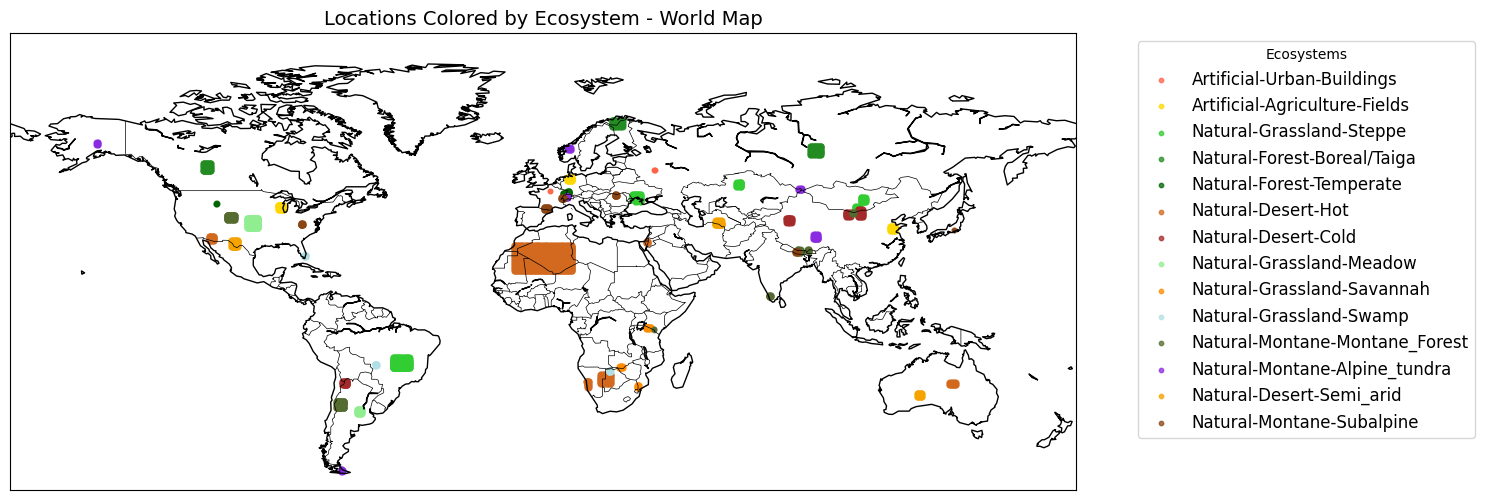

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load the data
df = pd.read_csv('training_data.csv')

# Set up the figure and Basemap for the World
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Define custom color palette for each ecosystem based on your provided list
ecosystem_color_map = {
    'Artificial-Urban-Buildings': '#FF6347',  # Red
    'Artificial-Agriculture-Fields': '#FFD700',  # Gold
    'Natural-Grassland-Steppe': '#32CD32',  # Lime Green
    'Natural-Forest-Boreal/Taiga': '#228B22',  # Forest Green
    'Natural-Forest-Temperate': '#006400',  # Dark Green
    'Natural-Desert-Hot': '#D2691E',  # Chocolate Brown
    'Natural-Desert-Cold': '#A52A2A',  # Brown
    'Natural-Grassland-Meadow': '#90EE90',  # Light Green
    'Natural-Grassland-Savannah': '#FF8C00',  # Dark Orange
    'Natural-Grassland-Swamp': '#B0E0E6',  # Powder Blue
    'Natural-Montane-Montane_Forest': '#556B2F',  # Dark Olive Green
    'Natural-Montane-Alpine_tundra': '#8A2BE2',  # Blue Violet
    'Natural-Desert-Semi_arid': '#F4A300',  # Orange Yellow
    'Natural-Montane-Subalpine': '#8B4513'   # Saddle Brown
}

# Create a list of unique ecosystems from the dataframe
unique_ecosystems = df['ecosystem'].unique()

# Plot each point, colored by ecosystem
scatter_objects = []  # To store scatter objects for the legend
for ecosystem in unique_ecosystems:
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    # Get the color for this ecosystem from the predefined color map
    color = ecosystem_color_map.get(ecosystem, '#808080')  # Default to gray if not found
    # Create scatter for this ecosystem and add it to the legend
    scatter = m.scatter(x, y, color=color, s=10, alpha=0.75, label=ecosystem)
    scatter_objects.append(scatter)  # Store scatter object for later use in legend

# Add a title
plt.title("Locations Colored by Ecosystem - World Map", fontsize=14)

# Add a legend for the ecosystems
plt.legend(handles=scatter_objects, title="Ecosystems", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_21320\3272274307.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ecosystem_colors = plt.cm.get_cmap('tab20', len(unique_ecosystems))  # Use 'tab20' colormap for diverse colors


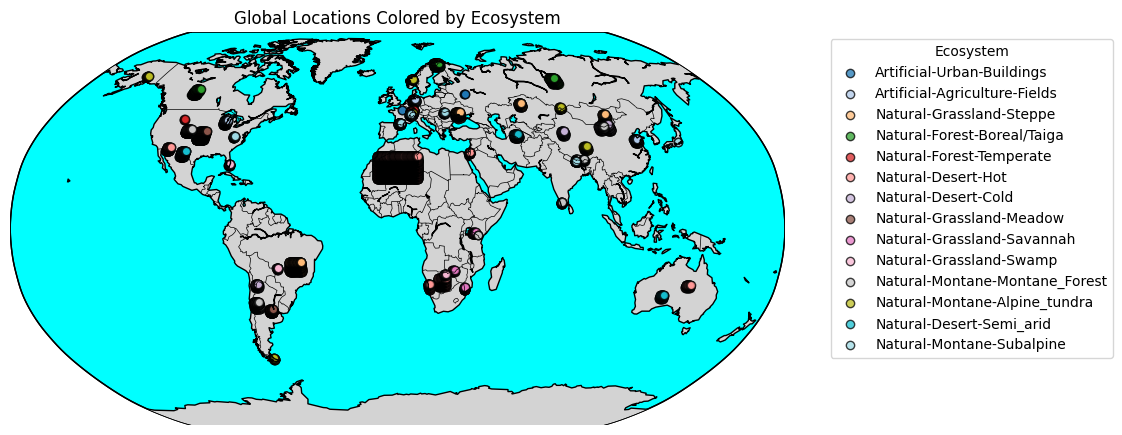

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load data
df = pd.read_csv("training_data.csv")

# Set up a Basemap instance with a global projection
plt.figure(figsize=(10, 7))
m = Basemap(projection='robin', resolution='c', lon_0=0)

# Draw coastlines, countries, and continents
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert lat/lon to map projection coordinates
x, y = m(df['lon'].values, df['lat'].values)

# Create a list of unique ecosystems and assign each a color
unique_ecosystems = df['ecosystem'].unique()
ecosystem_colors = plt.cm.get_cmap('tab20', len(unique_ecosystems))  # Use 'tab20' colormap for diverse colors

# Create a dictionary to map each ecosystem to a color
ecosystem_color_map = {ecosystem: ecosystem_colors(i) for i, ecosystem in enumerate(unique_ecosystems)}

# Plot the points, coloring by ecosystem
for ecosystem in unique_ecosystems:
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x_points, y_points = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    m.scatter(x_points, y_points, color=ecosystem_color_map[ecosystem], label=ecosystem, edgecolors='k', alpha=0.75)

# Add a legend to show which color corresponds to which ecosystem
plt.legend(title='Ecosystem', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title
plt.title("Global Locations Colored by Ecosystem")

# Show plot
plt.show()


C:\Users\Alexander\AppData\Local\Temp\ipykernel_24096\2435738468.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ecosystem_colors = plt.cm.get_cmap('tab20', len(unique_ecosystems))  # Use 'tab20' colormap for diverse colors


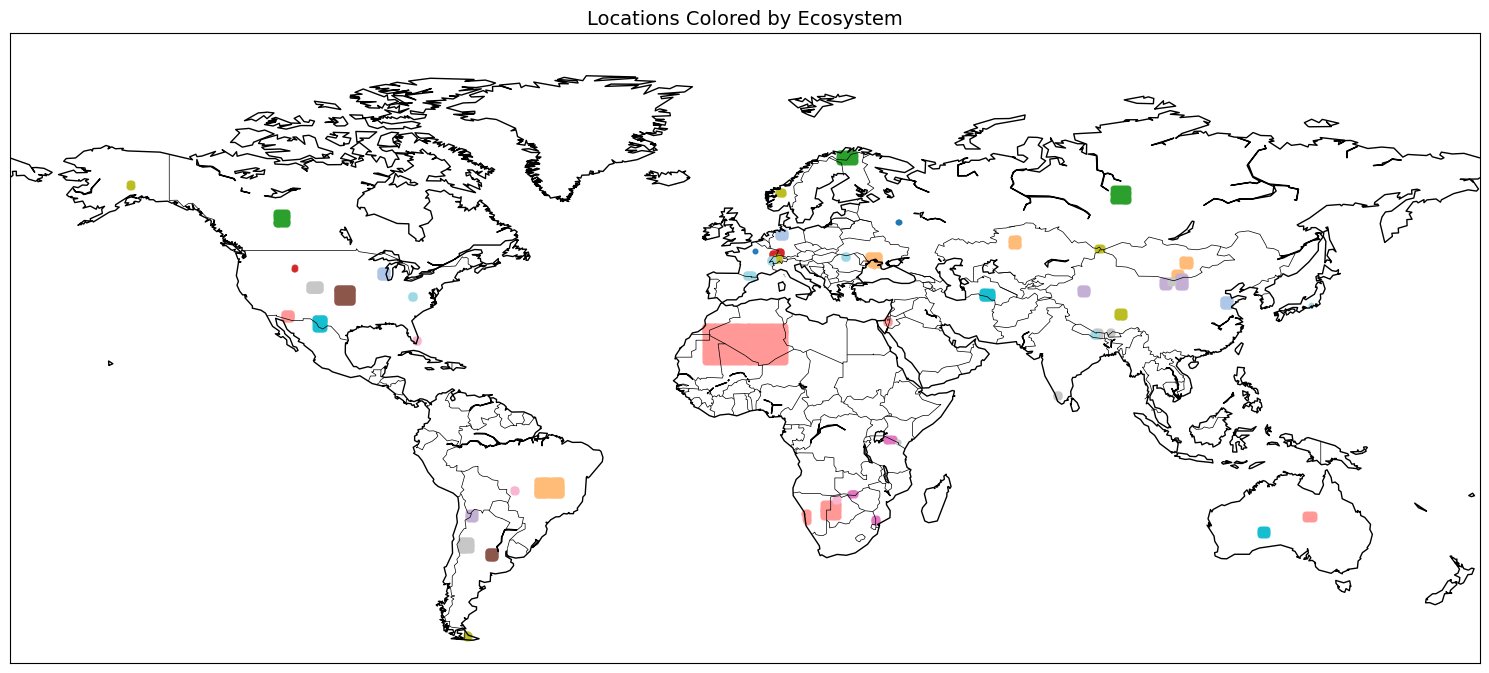

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

# Load the data
df = pd.read_csv('training_data.csv')

# Set up the figure and Basemap
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Create a list of unique ecosystems and assign each a color
unique_ecosystems = df['ecosystem'].unique()
ecosystem_colors = plt.cm.get_cmap('tab20', len(unique_ecosystems))  # Use 'tab20' colormap for diverse colors

# Plot each point, colored by ecosystem
for i, ecosystem in enumerate(unique_ecosystems):
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    m.scatter(x, y, color=ecosystem_colors(i), s=10, alpha=0.75, label=ecosystem)  # Plot each ecosystem

# Add a title
plt.title("Locations Colored by Ecosystem", fontsize=14)

# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()


C:\Users\Alexander\AppData\Local\Temp\ipykernel_24096\3120462759.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ecosystem_colors = plt.cm.get_cmap('tab20', len(unique_ecosystems))  # Custom colormap


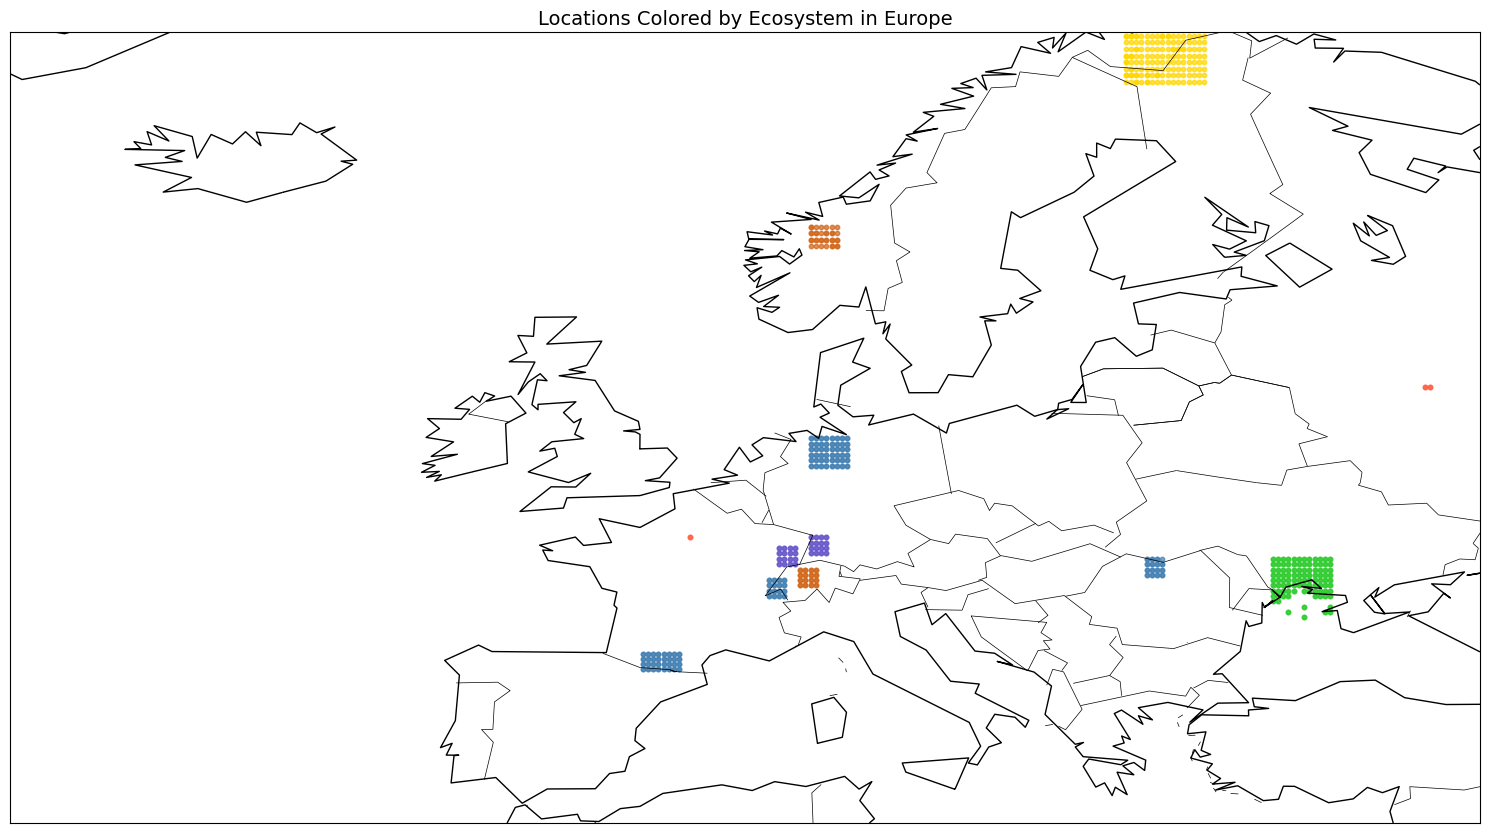

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load the data
df = pd.read_csv('training_data.csv')

# Set up the figure and Basemap for Europe
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=35, urcrnrlat=70, llcrnrlon=-30, urcrnrlon=40)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Create a list of unique ecosystems
unique_ecosystems = df['ecosystem'].unique()

# CUSTOMIZE COLOR PALETTE
# Choose a colormap (you can use 'tab20', 'viridis', 'plasma', 'coolwarm', etc.)
# Here we are using a custom palette, but you can modify this.
ecosystem_colors = plt.cm.get_cmap('tab20', len(unique_ecosystems))  # Custom colormap
# Alternatively, use a predefined color list
# custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD', '#D2691E']

# If you want to define your own custom color palette (as a list of colors):
custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD', '#D2691E']
ecosystem_color_map = {ecosystem: custom_colors[i % len(custom_colors)] for i, ecosystem in enumerate(unique_ecosystems)}

# Plot each point, colored by ecosystem
for ecosystem in unique_ecosystems:
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    # Use the custom color map
    color = ecosystem_color_map[ecosystem]
    m.scatter(x, y, color=color, s=10, alpha=0.75, label=ecosystem)  # Plot each ecosystem

# Add a title
plt.title("Locations Colored by Ecosystem in Europe", fontsize=14)

# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()


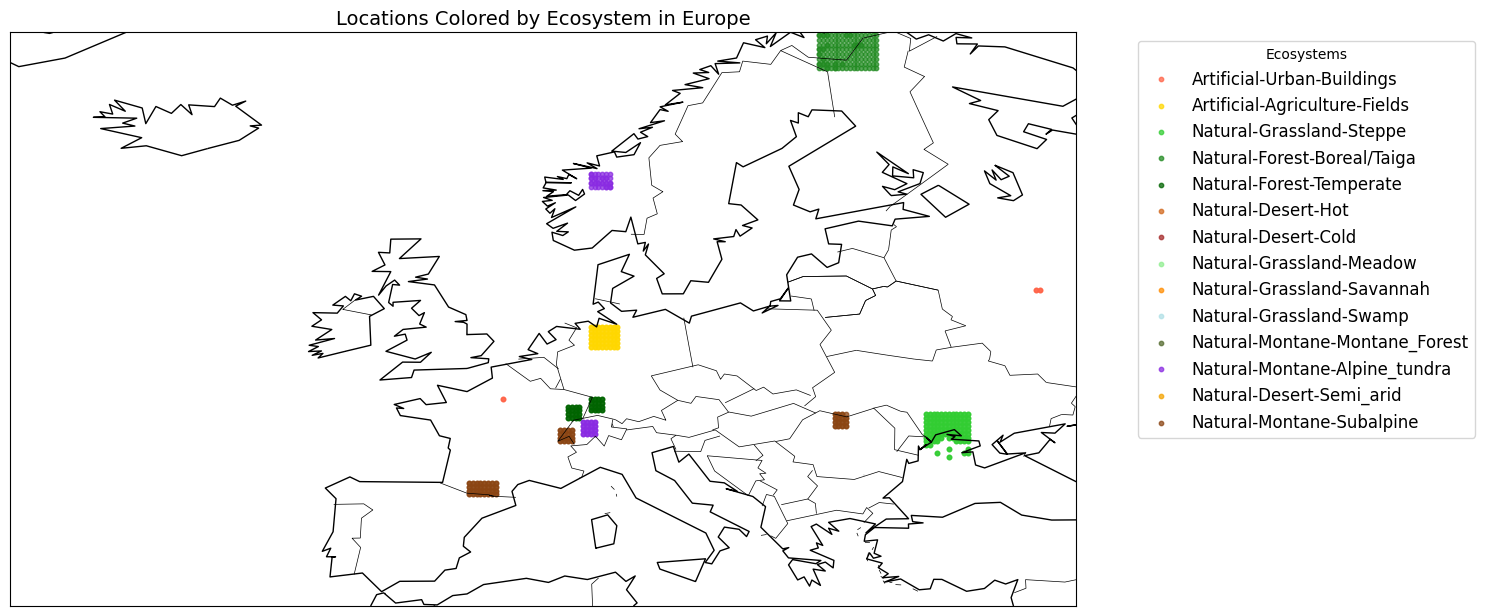

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load the data
df = pd.read_csv('training_data.csv')

# Set up the figure and Basemap for Europe
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=35, urcrnrlat=70, llcrnrlon=-30, urcrnrlon=40)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Define custom color palette for each ecosystem based on your provided list
ecosystem_color_map = {
    'Artificial-Urban-Buildings': '#FF6347',  # Red
    'Artificial-Agriculture-Fields': '#FFD700',  # Gold
    'Natural-Grassland-Steppe': '#32CD32',  # Lime Green
    'Natural-Forest-Boreal/Taiga': '#228B22',  # Forest Green
    'Natural-Forest-Temperate': '#006400',  # Dark Green
    'Natural-Desert-Hot': '#D2691E',  # Chocolate Brown
    'Natural-Desert-Cold': '#A52A2A',  # Brown
    'Natural-Grassland-Meadow': '#90EE90',  # Light Green
    'Natural-Grassland-Savannah': '#FF8C00',  # Dark Orange
    'Natural-Grassland-Swamp': '#B0E0E6',  # Powder Blue
    'Natural-Montane-Montane_Forest': '#556B2F',  # Dark Olive Green
    'Natural-Montane-Alpine_tundra': '#8A2BE2',  # Blue Violet
    'Natural-Desert-Semi_arid': '#F4A300',  # Orange Yellow
    'Natural-Montane-Subalpine': '#8B4513'   # Saddle Brown
}

# Create a list of unique ecosystems from the dataframe
unique_ecosystems = df['ecosystem'].unique()

# Plot each point, colored by ecosystem
scatter_objects = []  # To store scatter objects for the legend
for ecosystem in unique_ecosystems:
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    # Get the color for this ecosystem from the predefined color map
    color = ecosystem_color_map.get(ecosystem, '#808080')  # Default to gray if not found
    # Create scatter for this ecosystem and add it to the legend
    scatter = m.scatter(x, y, color=color, s=10, alpha=0.75, label=ecosystem)
    scatter_objects.append(scatter)  # Store scatter object for later use in legend

# Add a title
plt.title("Locations Colored by Ecosystem in Europe", fontsize=14)

# Add a legend for the ecosystems
plt.legend(handles=scatter_objects, title="Ecosystems", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()


In [18]:
df['ecosystem'].unique()

array(['Artificial-Urban-Buildings', 'Artificial-Agriculture-Fields',
       'Natural-Grassland-Steppe', 'Natural-Forest-Boreal/Taiga',
       'Natural-Forest-Temperate', 'Natural-Desert-Hot',
       'Natural-Desert-Cold', 'Natural-Grassland-Meadow',
       'Natural-Grassland-Savannah', 'Natural-Grassland-Swamp',
       'Natural-Montane-Montane_Forest', 'Natural-Montane-Alpine_tundra',
       'Natural-Desert-Semi_arid', 'Natural-Montane-Subalpine'],
      dtype=object)

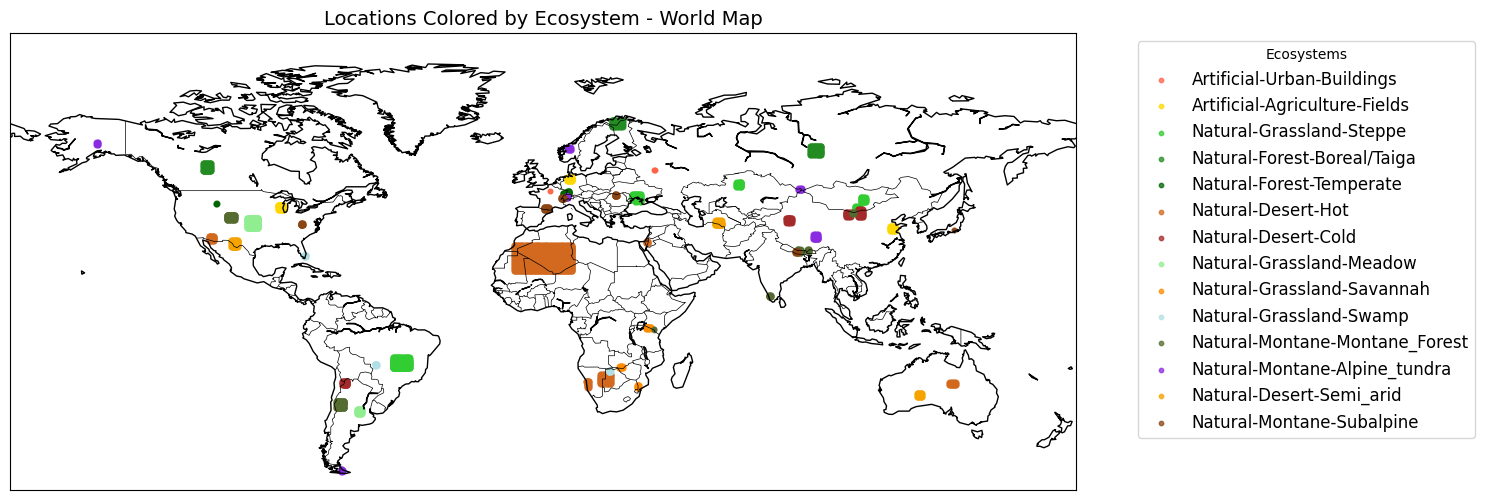

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load the data
df = pd.read_csv('training_data.csv')

# Set up the figure and Basemap for the World
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Define custom color palette for each ecosystem based on your provided list
ecosystem_color_map = {
    'Artificial-Urban-Buildings': '#FF6347',  # Red
    'Artificial-Agriculture-Fields': '#FFD700',  # Gold
    'Natural-Grassland-Steppe': '#32CD32',  # Lime Green
    'Natural-Forest-Boreal/Taiga': '#228B22',  # Forest Green
    'Natural-Forest-Temperate': '#006400',  # Dark Green
    'Natural-Desert-Hot': '#D2691E',  # Chocolate Brown
    'Natural-Desert-Cold': '#A52A2A',  # Brown
    'Natural-Grassland-Meadow': '#90EE90',  # Light Green
    'Natural-Grassland-Savannah': '#FF8C00',  # Dark Orange
    'Natural-Grassland-Swamp': '#B0E0E6',  # Powder Blue
    'Natural-Montane-Montane_Forest': '#556B2F',  # Dark Olive Green
    'Natural-Montane-Alpine_tundra': '#8A2BE2',  # Blue Violet
    'Natural-Desert-Semi_arid': '#F4A300',  # Orange Yellow
    'Natural-Montane-Subalpine': '#8B4513'   # Saddle Brown
}

# Create a list of unique ecosystems from the dataframe
unique_ecosystems = df['ecosystem'].unique()

# Plot each point, colored by ecosystem
scatter_objects = []  # To store scatter objects for the legend
for ecosystem in unique_ecosystems:
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    # Get the color for this ecosystem from the predefined color map
    color = ecosystem_color_map.get(ecosystem, '#808080')  # Default to gray if not found
    # Create scatter for this ecosystem and add it to the legend
    scatter = m.scatter(x, y, color=color, s=10, alpha=0.75, label=ecosystem)
    scatter_objects.append(scatter)  # Store scatter object for later use in legend

# Add a title
plt.title("Locations Colored by Ecosystem - World Map", fontsize=14)

# Add a legend for the ecosystems
plt.legend(handles=scatter_objects, title="Ecosystems", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()


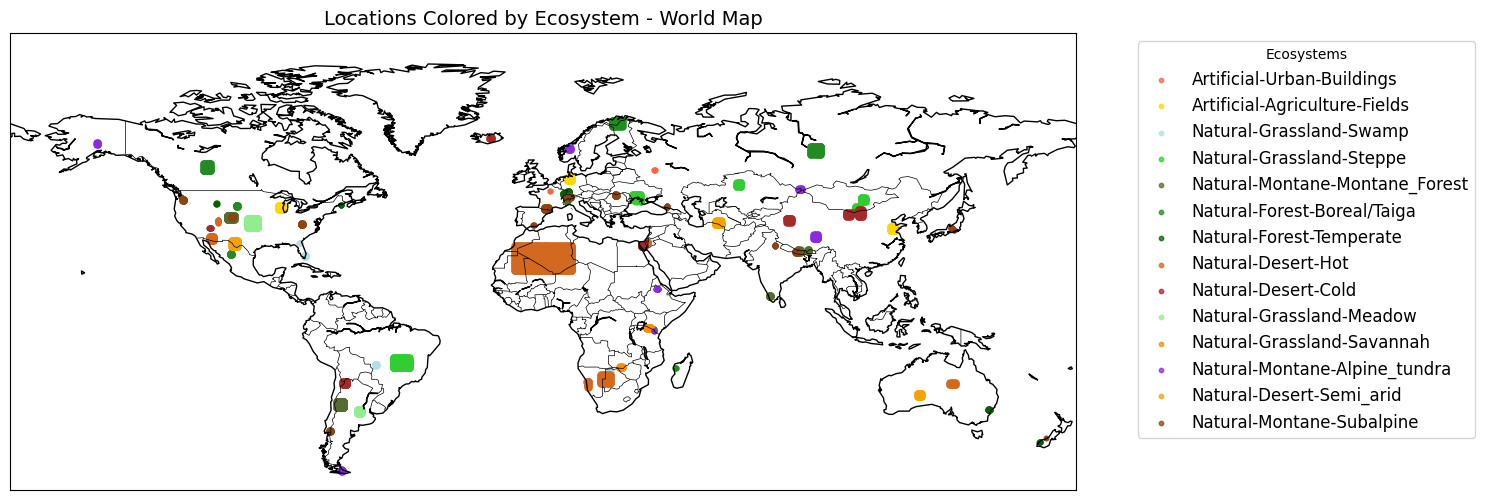

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load the data
df = pd.read_csv('20241111_trainingdata.csv')

# Set up the figure and Basemap for the World
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Define custom color palette for each ecosystem based on your provided list
ecosystem_color_map = {
    'Artificial-Urban-Buildings': '#FF6347',  # Red
    'Artificial-Agriculture-Fields': '#FFD700',  # Gold
    'Natural-Grassland-Steppe': '#32CD32',  # Lime Green
    'Natural-Forest-Boreal/Taiga': '#228B22',  # Forest Green
    'Natural-Forest-Temperate': '#006400',  # Dark Green
    'Natural-Desert-Hot': '#D2691E',  # Chocolate Brown
    'Natural-Desert-Cold': '#A52A2A',  # Brown
    'Natural-Grassland-Meadow': '#90EE90',  # Light Green
    'Natural-Grassland-Savannah': '#FF8C00',  # Dark Orange
    'Natural-Grassland-Swamp': '#B0E0E6',  # Powder Blue
    'Natural-Montane-Montane_Forest': '#556B2F',  # Dark Olive Green
    'Natural-Montane-Alpine_tundra': '#8A2BE2',  # Blue Violet
    'Natural-Desert-Semi_arid': '#F4A300',  # Orange Yellow
    'Natural-Montane-Subalpine': '#8B4513'   # Saddle Brown
}

# Create a list of unique ecosystems from the dataframe
unique_ecosystems = df['ecosystem'].unique()

# Plot each point, colored by ecosystem
scatter_objects = []  # To store scatter objects for the legend
for ecosystem in unique_ecosystems:
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    # Get the color for this ecosystem from the predefined color map
    color = ecosystem_color_map.get(ecosystem, '#808080')  # Default to gray if not found
    # Create scatter for this ecosystem and add it to the legend
    scatter = m.scatter(x, y, color=color, s=10, alpha=0.75, label=ecosystem)
    scatter_objects.append(scatter)  # Store scatter object for later use in legend

# Add a title
plt.title("Locations Colored by Ecosystem - World Map", fontsize=14)

# Add a legend for the ecosystems
plt.legend(handles=scatter_objects, title="Ecosystems", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()